# M1.D1: Bohr's hydrogen atom

## Learning Objectives

* Use loops in Python using Bohr's equation to calculate the first ten energy levels of hydrogen
* Use matplotlib to plot the electronic levels of hydrogen in the logorithmic scale
* Use loops in Python to calculate the wavelengths in nm for the first ten emissions of the Lyman series
* Use matplotlib to plot the emission spectrum of the Lyman series
* Repeat the same exercise for the Balmer and Paschen series
* Use frequency in Hz instead of wavelength to plot the three Hydrogen emission series

**Context and goals**
Before we discuss all the energy levels in atoms and molecules it may be interesting to discuss that scientists already knew that matter emitted certain values of light not a continuum. Explaining the spectral series of Hydrogen was a fundamental step towards the development of quantum theory for atoms and molecules.
Our goal today is to try to reproduce with Python the experimental spectral series of hydrogen.

## Experimental Spectral Series

For a long time scientists knew that the light that was coming out of hydrogen could be wrapped in series.

* Lyman's series (nf = 1)
* Balmer's series (nf = 2)
* Paschen's series (nf = 3)
* Bracket's series (nf = 4)

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Hydrogen_spectrum.svg"/>

Out of these series, only the Balmber series is visible 
<img src="https://upload.wikimedia.org/wikipedia/commons/6/60/Emission_spectrum-H.svg" />

There were even experimental equations to explain those lines and predict the wavelength of emission. The Rydeberg equation

$$
\frac{1}{\lambda} = R \left( \frac{1}{n_f^{2}} - \frac{1}{n_i^{2}} \right)
$$

Where $R = 1.09677583×10^{7} m^{−1}$



## Bohr's hydrogen model

Neils Bohr came up with they hypothesis that the electron "orbits" around the nucleus at a given and fixed energy level. For the original paper see <a href="https://link.springer.com/chapter/10.1007%2F978-3-319-14316-3_2">here</a>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b2/Hydrogen_transitions.svg"/>

The energy of the orbit depends on the quantum number $n = 1,2,3,4...$

$$ E_n = \frac{-13.6 eV}{n^{2}}
$$

Notice that the above equation is in electron Volts. That is, the unit of energy that one electron has in a 1 Volt poential: $q_{e^{-}} = 1.6*10^{-19} Coulombs $; $E=q*V$

$$\frac{  m_e e^4}{2 ( 4 \pi \varepsilon_0)^2 \hbar^2 } =\frac{m_{\text{e}} e^4}{8 h^2 \varepsilon_0^2}= 1 \,\text{Ry} = 13.605\;693\;122\;994(26) \,\text{eV}$$

**Lets do some Python**

The levels can be calculated with a loop

In [2]:
#lets get the energy levels using Bohr's equation

levels = []
numberLevels = 10
eV = 13.605693122994
for n in range(1,numberLevels+1):
    ene = -(eV/n**2)
    levels.append(ene)
    
print(levels)

[-13.605693122994, -3.4014232807485, -1.5117436803326667, -0.850355820187125, -0.54422772491976, -0.3779359200831667, -0.2776672065917143, -0.21258895504678124, -0.16797152003696295, -0.13605693122994]


**Your turn**: 

write a loop to print the first twenty levels of the hydrogen atom


The levels can be graphically displayed in a plot (notice that the x-axis does not have any physical meaning)

The variable numberLevels is =  10  and the number of levels computed is  10


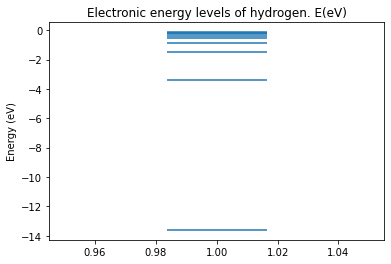

In [3]:
import matplotlib.pyplot as plt
import numpy as np

print("The variable numberLevels is = ",numberLevels," and the number of levels computed is ",len(levels))
x = [1]*numberLevels #all points in the x axis will have a value of 1 so that they are in vertical order
y = levels #the levels is the list of energies computer in the previous cells
plt.scatter(x, y,marker = "_",s=10000) #s is the marker size, we make it big (1000) to see it
plt.title("Electronic energy levels of hydrogen. E(eV)")
plt.ylabel("Energy (eV)")
plt.show()

**Your turn**
* Notice that the previous code starts with "import". What does that do?
* Notice that the previous code has the "#" sign. What does that do?

### Logarithmic scale

As you can see higher energy levels merge very easily. We can use a logarithmic scale to see more levels

The variable numberLevels is =  10  and the number of levels computed is  10


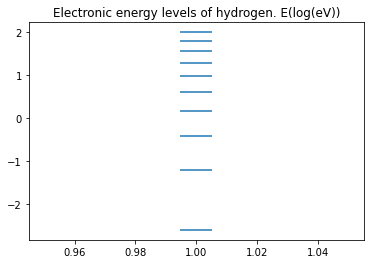

In [5]:
import math

print("The variable numberLevels is = ",numberLevels," and the number of levels computed is ",len(levels))
loglevels = []
for n in range(1,numberLevels+1):
    ene = (eV/n**2)
    logene = -math.log(ene)
    #print(ene,logene)
    loglevels.append(logene)
    
x = [1]*numberLevels
y = loglevels
plt.scatter(x, y,marker = "_",s=1000)

plt.title("Electronic energy levels of hydrogen. E(log(eV))")
plt.show()

* Why in the logarithmic scale some energies are negative and others are positive?

## Calculating wavelengths of the Lyman series

Since we know the energy of each electronic level, we can calculate the energy difference between levels and convert the energy into wavelength of the photon involved.

* We need to convert the units of energy eV into joules knowing that $1.6x10^{-19} J = 1 eV$
* Remember that the speed of light relate the wavelength (in meters) with the frequency (in $s^{-1}$) of the photon

$$ c = \lambda *\nu$$ 
$$E = h*\nu = \frac{h*c}{\lambda} ; \lambda = \frac{h*c}{E}$$ 

In [33]:
#now let's see what the spectrum looks like

#constants
c = 299792458 
h = 6.62607004*10**(-34)
qe = 1.60217662*10**(-19)

nf = 1 #Calculating the Lyman series, so the final level is always 1 
wavelengths = []
for ni in range(nf+1,numberLevels+1):
    #the emission process is exothermic, so it's negative, let's make it positive for getting the wavelengths
    energy_difference = -(levels[nf-1] - levels[ni-1])*qe
    lamda = (c*h/energy_difference)*10**9
    print("The energy difference between level",ni, "and level",nf," is =",energy_difference,"J. And Lamda=",lamda,"nm")
    wavelengths.append(lamda)
    
print(wavelengths)


The energy difference between level 2 and level 1  is = 1.6349042565416829e-18 J. And Lamda= 121.5022724556172 nm
The energy difference between level 3 and level 1  is = 1.937664304049402e-18 J. And Lamda= 102.51754238442699 nm
The energy difference between level 4 and level 1  is = 2.0436303206771033e-18 J. And Lamda= 97.20181796449377 nm
The energy difference between level 5 and level 1  is = 2.0926774483733542e-18 J. And Lamda= 94.92365035595093 nm
The energy difference between level 6 and level 1  is = 2.1193203325540334e-18 J. And Lamda= 93.73032446576184 nm
The energy difference between level 7 and level 1  is = 2.1353851514013818e-18 J. And Lamda= 93.0251773488319 nm
The energy difference between level 8 and level 1  is = 2.145811836710959e-18 J. And Lamda= 92.57315996618453 nm
The energy difference between level 9 and level 1  is = 2.152960337832669e-18 J. And Lamda= 92.2657881459843 nm
The energy difference between level 10 and level 1  is = 2.1580736186350215e-18 J. And Lamda

* Find in the code where the energy is converted from eV to Joules.
* Find in the code where the wavelength is converted into nanometers.
* At what wavelength does the Lyman series converge? Why does it converge?
* To view the wavelengths of the Balmer series you only need to change one value above. Which one is it? At what value of wavelength does the Balmer series converge?

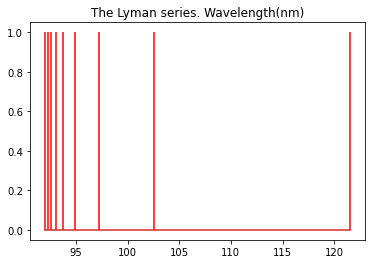

In [44]:
y = [1]*(numberLevels-nf) # this is the height of the signal. It doesnt matter, just height = 1
fig, ax = plt.subplots()
ax.stem(wavelengths, y, markerfmt=' ',linefmt='red')
plt.title("The Lyman series. Wavelength(nm)")
plt.show()

* In the graph above which line corresponds to smallest "electron jump"? Which line to the largest "electron jump"?

## What to report

1. In a separate notebook answer all the questions asked in cells labeled "Exercise".
2. Find the wavelength at which each the series (Lyman, Balmer, Paschen...) converge
3. Plot all the series
4. Find the frequency at which each the series (Lyman, Balmer, Paschen...) converge
5. Plot the Lyman series in terms of frequencies. Identify which line corresponds to the largest "electron jump".
6. **Only if you think that the previous exercises were too easy**, go ahead and plot in a single graph all the series so that you can reproduce the first image of this notebook. (*I don't expect anyone to do this, but if you're having the time of your life with Python I want to make sure that you see that there's always more "fun" to be had*)

## References
* https://en.wikipedia.org/wiki/Hydrogen_spectral_series
* https://www.khanacademy.org/science/physics/quantum-physics/atoms-and-electrons/a/bohrs-model-of-hydrogen 
* https://link.springer.com/chapter/10.1007%2F978-3-319-14316-3_2